<h1>Import frameworks</h1>

In [1]:
from matplotlib import pyplot
import tarfile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h1>Read emails</h1>

In [2]:
def decode_bytes(bytes, encodings=('utf-8', 'ascii', 'ISO-8859-1')):
    for encoding in encodings:
        try:
            decoded_text = bytes.decode(encoding)
            return decoded_text
        except UnicodeDecodeError:
            continue
    return None

def parse_tar_bz2(file_path):
    emails = []
    try:
        with tarfile.open(file_path, 'r:bz2') as tar:
            for member in tar.getmembers():
                #print("File:", member.name)
                file = tar.extractfile(member)
                if file is not None:
                    content = file.read()
                    emails.append(decode_bytes(content))
    except tarfile.TarError as e:
        print("Error occurred while processing the tar.bz2 file:", e)
    return emails


<h1>Evaluate model</h1>

In [6]:
pyplot.rcParams['text.usetex'] = True

def evaluate_model(y_test, y_pred, title, classifier):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(title + " " + classifier + " accuracy:", accuracy)
    print(title + " " + classifier + " precision:", precision)
    print(title + " " + classifier + " recall:", recall)
    print(title + " " + classifier + " F1 score:", 2 * (precision * recall) / (precision + recall))

    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = pyplot.subplots(figsize=(8, 6), layout='constrained')
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Spam', title], 
                yticklabels=['Spam', title])
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix ' + title + ' ' + classifier) 
    filename = title + '_' + classifier + '_confusion_matrix.pdf'
    filename = filename.replace(' ', '_').lower()
    fig.savefig(filename, bbox_inches='tight')



<h1>Classify email</h1>

In [4]:
def classify_email(emails, labels, title):
   
    vectorizer = CountVectorizer()

    # Fit CountVectorizer object to email data and
    # Transform email data into a matrix of token counts
    email_matrix = vectorizer.fit_transform(emails)
    # Split data into training and test sets, with 20% of data reserved for testing
    X_train, X_test, y_train, y_test = train_test_split(email_matrix, labels, test_size=0.2)

    # Train classifier (Multinomial Naive Bayes and Bernoulli Naive Bayes)
    classifierMNB = MultinomialNB()
    classifierBNB = BernoulliNB()
    classifierMNB.fit(X_train, y_train)
    classifierBNB.fit(X_train, y_train)

    # Evaluate the classifier
    y_predMNB = classifierMNB.predict(X_test)
    y_predBNB = classifierBNB.predict(X_test)
    
   

    evaluate_model(y_test, y_predMNB, title, "Multinomial Naive Bayes")
    evaluate_model(y_test, y_predBNB, title, "Bernoulli Naive Bayes")


<h1>Load emails and classify</h1>

Easy ham and Spam Multinomial Naive Bayes accuracy: 0.9852700490998363
Easy ham and Spam Multinomial Naive Bayes precision: 0.9844357976653697
Easy ham and Spam Multinomial Naive Bayes recall: 0.9980276134122288
Easy ham and Spam Multinomial Naive Bayes F1 score: 0.991185112634672
Easy ham and Spam Bernoulli Naive Bayes accuracy: 0.9230769230769231
Easy ham and Spam Bernoulli Naive Bayes precision: 0.9181818181818182
Easy ham and Spam Bernoulli Naive Bayes recall: 0.9960552268244576
Easy ham and Spam Bernoulli Naive Bayes F1 score: 0.9555345316934721
Hard ham and Spam Multinomial Naive Bayes accuracy: 0.9470198675496688
Hard ham and Spam Multinomial Naive Bayes precision: 0.9555555555555556
Hard ham and Spam Multinomial Naive Bayes recall: 0.8775510204081632
Hard ham and Spam Multinomial Naive Bayes F1 score: 0.9148936170212767
Hard ham and Spam Bernoulli Naive Bayes accuracy: 0.9337748344370861
Hard ham and Spam Bernoulli Naive Bayes precision: 0.975609756097561
Hard ham and Spam Bern

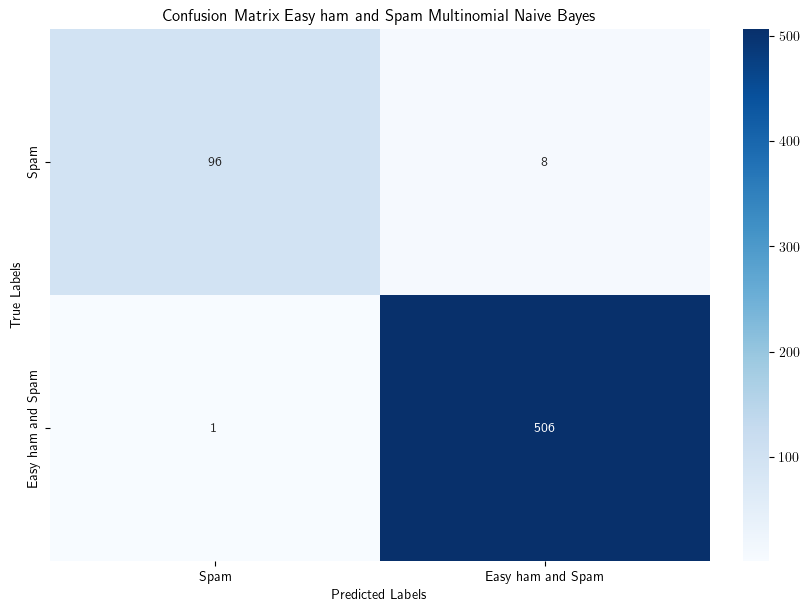

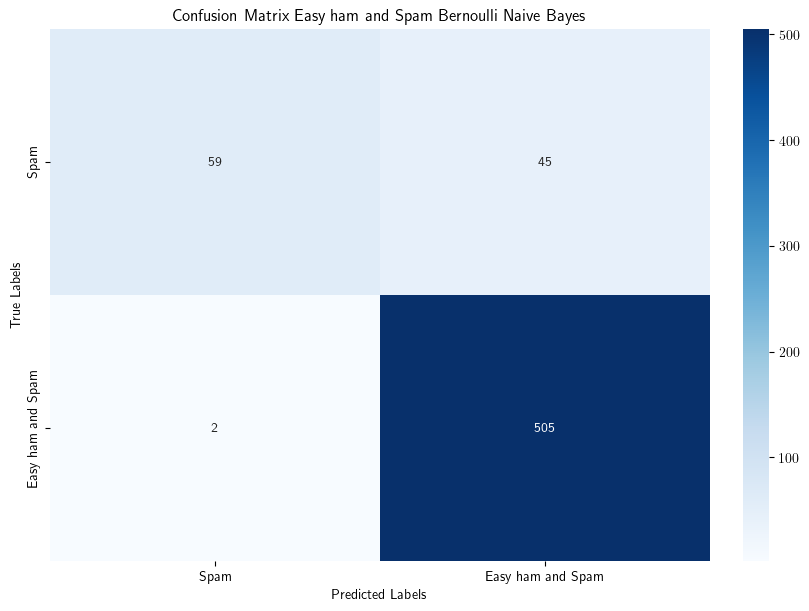

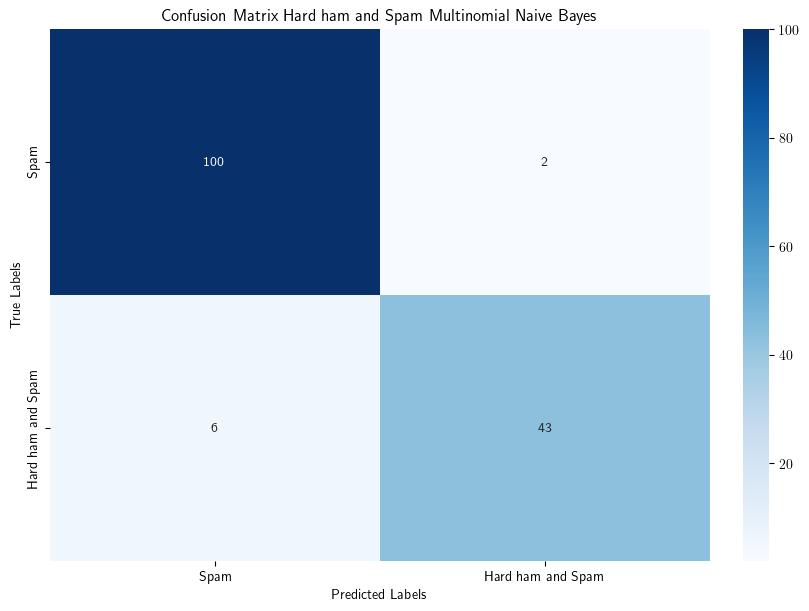

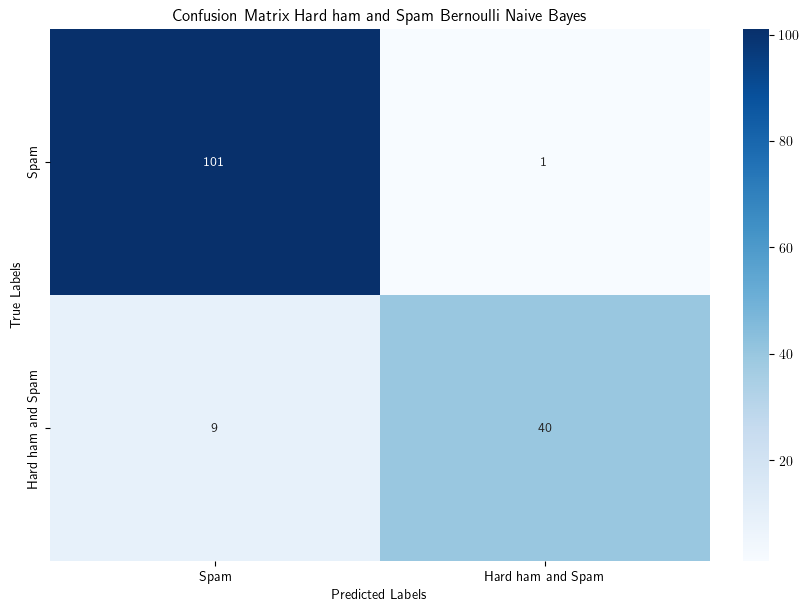

In [7]:
file_path_easy_ham = "../20021010_easy_ham.tar.bz2"  
emails_easy_ham = parse_tar_bz2(file_path_easy_ham)
file_path_hard_ham = "../20021010_hard_ham.tar.bz2"  
emails_hard_ham = parse_tar_bz2(file_path_hard_ham)
file_path_spam = "../20021010_spam.tar.bz2"  
emails_spam = parse_tar_bz2(file_path_spam)

labels_easy_and_spam = [1] * len(emails_easy_ham) + [0] * len(emails_spam)
emails_easy_and_spam = emails_easy_ham + emails_spam

labels_hard_and_spam = [1] * len(emails_hard_ham) + [0] * len(emails_spam)
emails_hard_and_spam = emails_hard_ham + emails_spam

classify_email(emails_easy_and_spam, labels_easy_and_spam, "Easy ham and Spam")
classify_email(emails_hard_and_spam, labels_hard_and_spam, "Hard ham and Spam")